## 1. Importing Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import os

## 2. Importing the dataset

In [3]:
from tensorflow.keras.datasets import mnist

2023-12-18 19:04:30.811470: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 19:04:30.843737: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 19:04:30.844340: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-18 19:04:31.382075: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()

print("train_x shape : ", train_x.shape)
print("train_y shape : ", train_y.shape)
print("test_x shape : ", test_x.shape)
print("test_y shape : ", test_y.shape)

print()

img_height , img_width = train_x[0].shape

print(f"Image width : {img_width}   |  Image height : {img_height}")

train_x shape :  (60000, 28, 28)
train_y shape :  (60000,)
test_x shape :  (10000, 28, 28)
test_y shape :  (10000,)

Image width : 28   |  Image height : 28


#### Displaying a picture from the dataset

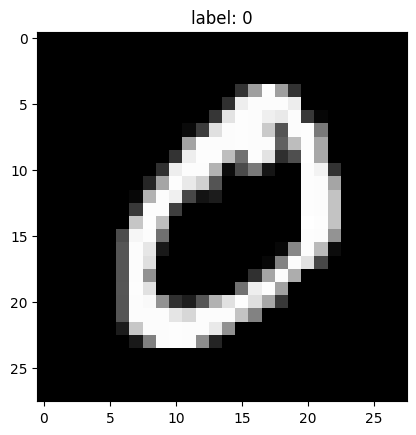

In [5]:
plt.imshow(train_x[1], cmap="gray")
plt.title(f"label: {train_y[1]}")
plt.show()

## 3. Function to put a picture from our dataset at a random position on an x by y background

In [6]:
def put_at_random_position(img, h , w):               # (image , background height, background width)
    img_w = img.shape[1]
    img_h = img.shape[0]
    
    if img_w >= w or img_h >= h:
        print("The background size should be bigger than the image size")
        return None
        
    else:        
        # define a black background of size w by h           
        background = np.zeros((h,w), dtype='uint8')                # since each pixel requires only 8 bits we use uint8 as dtype
        
        # generate random position for the image on the background
        x = np.random.randint(0, w - img_w)
        y = np.random.randint(0, h - img_h)

        # paste the image on the background at the random positions we generated above
        background[y : y+img_h , x : x+img_w ] = img

        # # converting the background image to RGB scale
        # c_background = cv2.cvtColor(background, cv2.COLOR_GRAY2RGB)

        return background,x,y
        

#### Calling the function on an image from our dataset

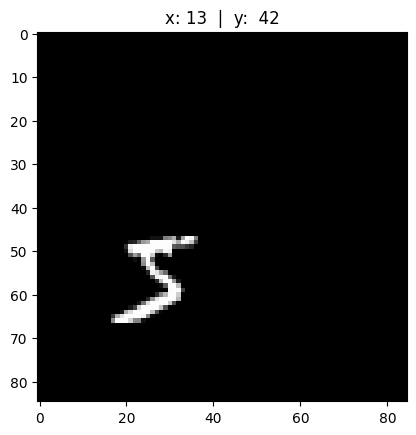

In [7]:
pic,x,y = put_at_random_position(train_x[0] , 85, 85)

plt.title(f"x: {x}  |  y:  {y}")
plt.imshow(pic, cmap='gray')

## 4. Storing our train data as image above with its respective coordinates

In [8]:
m = train_x.shape[0]

for i in range(m):
    
    # randomly resizing our image between 20 * 20 and 40 * 40
    resize_dim = np.random.randint(20,40)
    resized = cv2.resize(train_x[i], (resize_dim,resize_dim), interpolation = cv2.INTER_AREA)
    
    generated_pic, x , y = put_at_random_position(resized, 80 , 80)

    # saving the generated pciture
    cv2.imwrite(f"./dataset/train/images/{i}.png", generated_pic)

    # drawing the bound box around the picture
    bbox = cv2.rectangle(generated_pic, (x,y), (x+resize_dim, y+resize_dim), (255,0,0) , 2)    # (pic , start , end , color, thickness)
    # saving the generated picture along with the bounding box
    cv2.imwrite(f"./dataset/train/bboxes/{i}.png", generated_pic)
    
    with open(f'./dataset/train/annotations/{i}.txt', 'w') as f:
        f.write(f"{train_y[i]} {x} {y} {x+resize_dim} {y+resize_dim}\n")   # class label , xmin , ymin , xmax, ymax
    

## 5. Storing our test data as well

In [9]:
m = test_x.shape[0]

for i in range(m):

    # randomly resizing our image between 20 * 20 and 40 * 40
    resize_dim = np.random.randint(20,40)
    resized = cv2.resize(test_x[i], (resize_dim,resize_dim), interpolation = cv2.INTER_AREA)
    
    generated_pic, x , y = put_at_random_position(resized, 80 , 80)
    
    # saving the generated pciture
    cv2.imwrite(f"./dataset/test/images/{i}.png", generated_pic)
  
    # drawing the bound box around the picture
    bbox = cv2.rectangle(generated_pic, (x,y), (x+resize_dim, y+resize_dim), (255,0,0) , 2)    # (pic , start , end , color, thickness)

    # saving the generated picture along with the bounding box
    cv2.imwrite(f"./dataset/test/bboxes/{i}.png", generated_pic)
    
    with open(f'./dataset/test/annotations/{i}.txt', 'w') as f:
        f.write(f"{test_y[i]} {x} {y} {x+resize_dim} {y+resize_dim}\n")   # class label , xmin , ymin , xmax, ymax
                            